In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import spearmanr
from scipy.ndimage import label

In [52]:
figure_dir = '../../figures/fig2/'
supp_figure_dir = '../../figures/supp/'
main_figure_dir = '../../figures/'

In [53]:
# load data
horm_beh = np.load('../../data/processed/compounds_aligned_speed.npy', allow_pickle=True).item()
X1m = horm_beh['X1m'].T
X1a = horm_beh['X1a'].T
X2m = horm_beh['X2m'].T
X2a = horm_beh['X2a'].T
X3ma = horm_beh['X3'].T
nan_masks = horm_beh['nan_masks']
y1m = horm_beh['y1m']
y1a = horm_beh['y1a']
y2m = horm_beh['y2m']
y2a = horm_beh['y2a']
y3 = horm_beh['y3']
common_comps = horm_beh['common_comps']

In [54]:
def robust_zscore(data, axis=0, log_transform=False, z_transform=True):
    if log_transform:
        data = np.log(data)
    median = np.nanmedian(data, axis=axis)
    mad = np.nanmedian(np.abs(data - median), axis=axis)
    if z_transform:
        zscore = (data - median) / mad
    else:
        zscore = data - median
    return zscore

# robust z-score each compound within individual animal first
X1 = robust_zscore(np.concatenate([X1m, X1a], axis=0), log_transform=False)
X2 = robust_zscore(np.concatenate([X2m, X2a], axis=0), log_transform=False)
X3 = robust_zscore(X3ma, log_transform=False)

y1 = np.concatenate([y1m, y1a], axis=0)
y2 = np.concatenate([y2m, y2a], axis=0)
y3 = y3

# concatenate data
X = np.concatenate([X1, X2, X3], axis=0)
y = robust_zscore(np.concatenate([y1m, y1a, y2m, y2a, y3], axis=0), log_transform=True, z_transform=False)
n_samples, n_features = X.shape

In [55]:
# define functions
# spearman R cross correlation
def spearman_ccf(x, y, max_lag):
    lags = np.arange(-max_lag+1, max_lag)
    ccf = [spearmanr(x[max_lag+lag:-max_lag+lag], 
                     y[max_lag: -max_lag])[0] for lag in lags]
    return lags, ccf

def plot_ccf(idx, common_comps, max_lag=9,x_ax=True,y_ax=True):
    lags, ccf = spearman_ccf(X[:,idx],y,max_lag)
    plt.axvline(0, color='k', ls='--')
    plt.stem(np.array(lags*7.5), ccf,linefmt='dimgrey',basefmt='k')
    if x_ax:
        plt.xlabel('Lag (min)')
    else:
        plt.xticks([])
    if y_ax:
        plt.ylabel('Spearman R')
    else:
        plt.yticks([])

    comp_name = common_comps[idx]
    if len(comp_name) > 15:
        plt.title(comp_name[:15] + '\n' + comp_name[15:30])
    else:
        plt.title(comp_name)
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # remove background white squares
    plt.gca().set_facecolor('none')
    
def plot_speed_compound(name,Xs=X3,Ys=y3,common_comps=common_comps): # use X3, y3 as specific example throughout
    idx = common_comps.index(name)
    plt.plot(Xs[:, idx],c='#65BADA')
    plt.title(common_comps[idx])
    plt.ylabel('Log Dansyl ratio')
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(ticks=np.arange(0, 7)*10, labels=np.arange(0, 7)*75)
    plt.xlabel('Time (min)')

    # remove background white squares
    plt.gca().set_facecolor('none')
    plt.twinx()
    plt.plot(0,0,label=name)
    plt.plot(Ys, c='#D4668F', ls='--')
    
    plt.ylabel('avg. speed (cm/sec)')
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    # remove background white squares
    plt.gca().set_facecolor('none')
    

## Figure 2B, C, D, E top

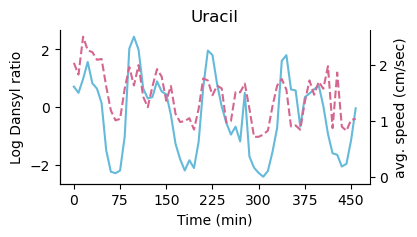

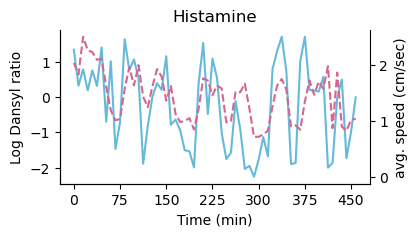

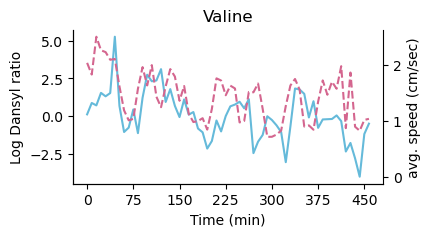

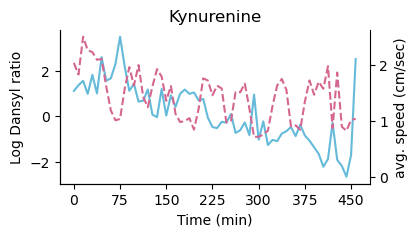

In [56]:
# uracil, histamine, valine, kynurenine
plt.figure(figsize=(4, 2))
plot_speed_compound('Uracil')
plt.savefig(figure_dir+'2B_uracil_speed.eps', dpi=600)
plt.figure(figsize=(4, 2))
plot_speed_compound('Histamine')
plt.savefig(figure_dir+'2C_histamine_speed.eps', dpi=600)
plt.figure(figsize=(4, 2))
plot_speed_compound('Valine')
plt.savefig(figure_dir+'2D_valine_speed.eps', dpi=600)
plt.figure(figsize=(4, 2))
plot_speed_compound('Kynurenine')
plt.savefig(figure_dir+'2E_kynurenine_speed.eps', dpi=600)

## Figure 2F

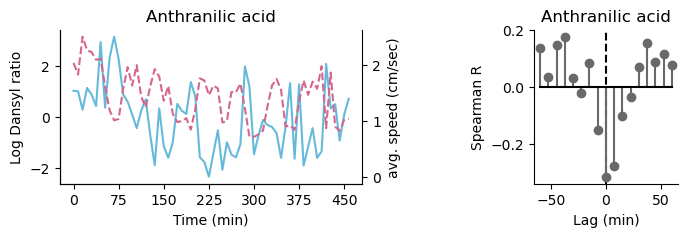

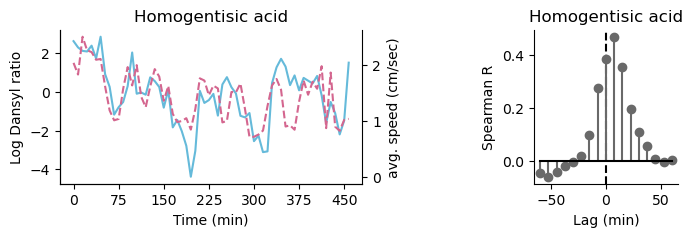

In [57]:
# plot anthranilic acid
fig = plt.figure(figsize=(9,2))
gs = GridSpec(1,9,figure=fig)
ax1=fig.add_subplot(gs[0,1:5])
plot_speed_compound('Anthranilic acid')
ax2=fig.add_subplot(gs[0,7:9])
plot_ccf(common_comps.index('Anthranilic acid'),common_comps)
plt.title('Anthranilic acid')
plt.savefig(figure_dir+'2F_anthranilic_acid_speed.eps', dpi=600)

# homogentistic acid
fig = plt.figure(figsize=(9,2))
gs = GridSpec(1,9,figure=fig)
ax1=fig.add_subplot(gs[0,1:5])
plot_speed_compound('Homogentisic acid')
ax2=fig.add_subplot(gs[0,7:9])
plot_ccf(common_comps.index('Homogentisic acid'),common_comps)
plt.title('Homogentisic acid')
plt.savefig(figure_dir+'2F_homogentisic_acid_speed.eps', dpi=600)

## Figure 2B bottom

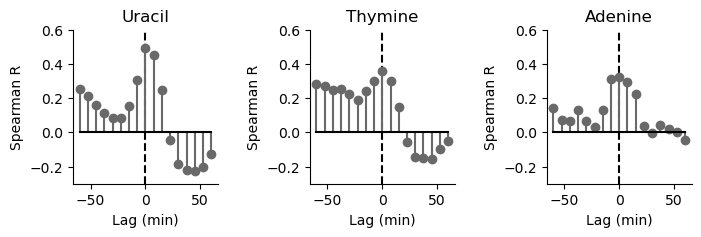

In [58]:
# plot cross correlogram of xhantine, adenosine, and adenine with behavior

fig = plt.figure(figsize=(9,2))
gs = GridSpec(1,9,figure=fig)
ax1=fig.add_subplot(gs[0,1:3])
plot_ccf(common_comps.index('Uracil'),common_comps)
plt.ylim(-0.3,.6)
ax2=fig.add_subplot(gs[0,4:6])
plot_ccf(common_comps.index('Thymine'),common_comps)
plt.ylim(-0.3,.6)
ax3=fig.add_subplot(gs[0,7:9])
plot_ccf(common_comps.index('Adenine'),common_comps)
plt.ylim(-0.3,.6)
plt.savefig(figure_dir+'2B_purines_speed_ccf.eps', dpi=600)

## Figure 2C bottom

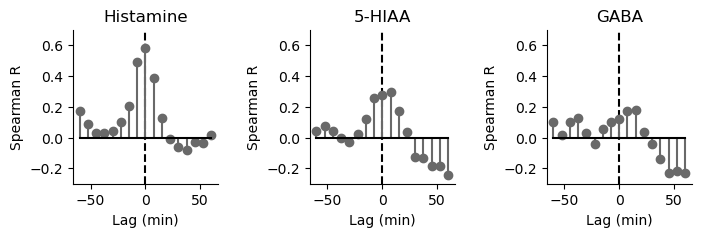

In [59]:
# plot cross_corr of GABA, histamine, and 5hiaa 
fig=plt.figure(figsize=(9, 2))
gs = GridSpec(1,9,figure=fig)
ax1=fig.add_subplot(gs[0,1:3])
plot_ccf(common_comps.index('Histamine'),common_comps)
plt.ylim(-0.3,.7)

ax2=fig.add_subplot(gs[0,4:6])
plot_ccf(common_comps.index('5-Hydroxyindoleacetic acid'), common_comps)
plt.title('5-HIAA')
plt.ylim(-0.3,.7)

ax3=fig.add_subplot(gs[0,7:9])
plot_ccf(common_comps.index('gamma-Aminobutyric acid'), common_comps)
plt.title('GABA')
plt.ylim(-0.3,.7)

plt.savefig(figure_dir+'2C_histamine_5hiaa_gaba_ccf.eps', dpi=600)
plt.show()

## Figure 2D bottom

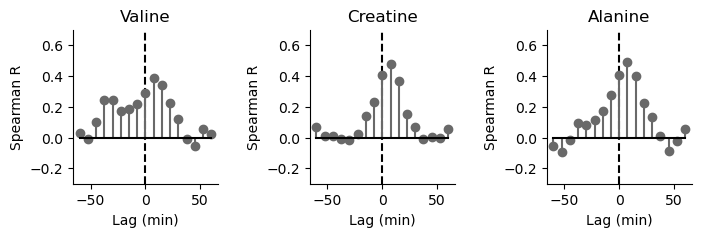

In [60]:
# plot cross corr for valine, creatine, alanine
fig=plt.figure(figsize=(9, 2))
gs = GridSpec(1,9,figure=fig)
ax1=fig.add_subplot(gs[0,1:3])
plot_ccf(common_comps.index('Valine'),common_comps)
plt.ylim(-0.3,.7)

ax2=fig.add_subplot(gs[0,4:6])
plot_ccf(common_comps.index('Creatine'),common_comps)
plt.ylim(-0.3,.7)

ax3=fig.add_subplot(gs[0,7:9])
plot_ccf(common_comps.index('Alanine'),common_comps)
plt.ylim(-0.3,.7)

plt.savefig(figure_dir+'2D_val_cre_ala_ccf.eps', dpi=600)
plt.show()

## Figure 2E bottom

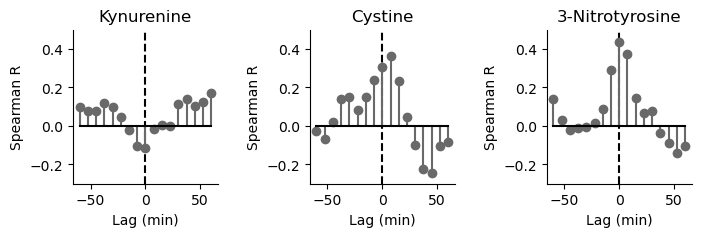

In [61]:
# n formyl kynurenine, cystine, 3-Nitrotyrosine
fig=plt.figure(figsize=(9, 2))
gs = GridSpec(1,9,figure=fig)
ax1=fig.add_subplot(gs[0,1:3])
plot_ccf(common_comps.index('Kynurenine'),common_comps)
plt.ylim(-0.3,.5)

ax2=fig.add_subplot(gs[0,4:6])
plot_ccf(common_comps.index('Cystine'),common_comps)
plt.ylim(-0.3,.5)

ax3=fig.add_subplot(gs[0,7:9])
plot_ccf(common_comps.index('3-Nitrotyrosine'),common_comps)
plt.ylim(-0.3,.5)

plt.savefig(figure_dir+'2E_kynurenine_cystine_3NT_ccf.eps', dpi=600)
plt.show()

## Supplementary Figure 6

In [62]:
# compute all ccgs
all_ccgs = {}
for i, comp in enumerate(common_comps):
    lags, rs = spearman_ccf(X[:, i], y, max_lag=9)
    all_ccgs[comp] = (lags, rs)

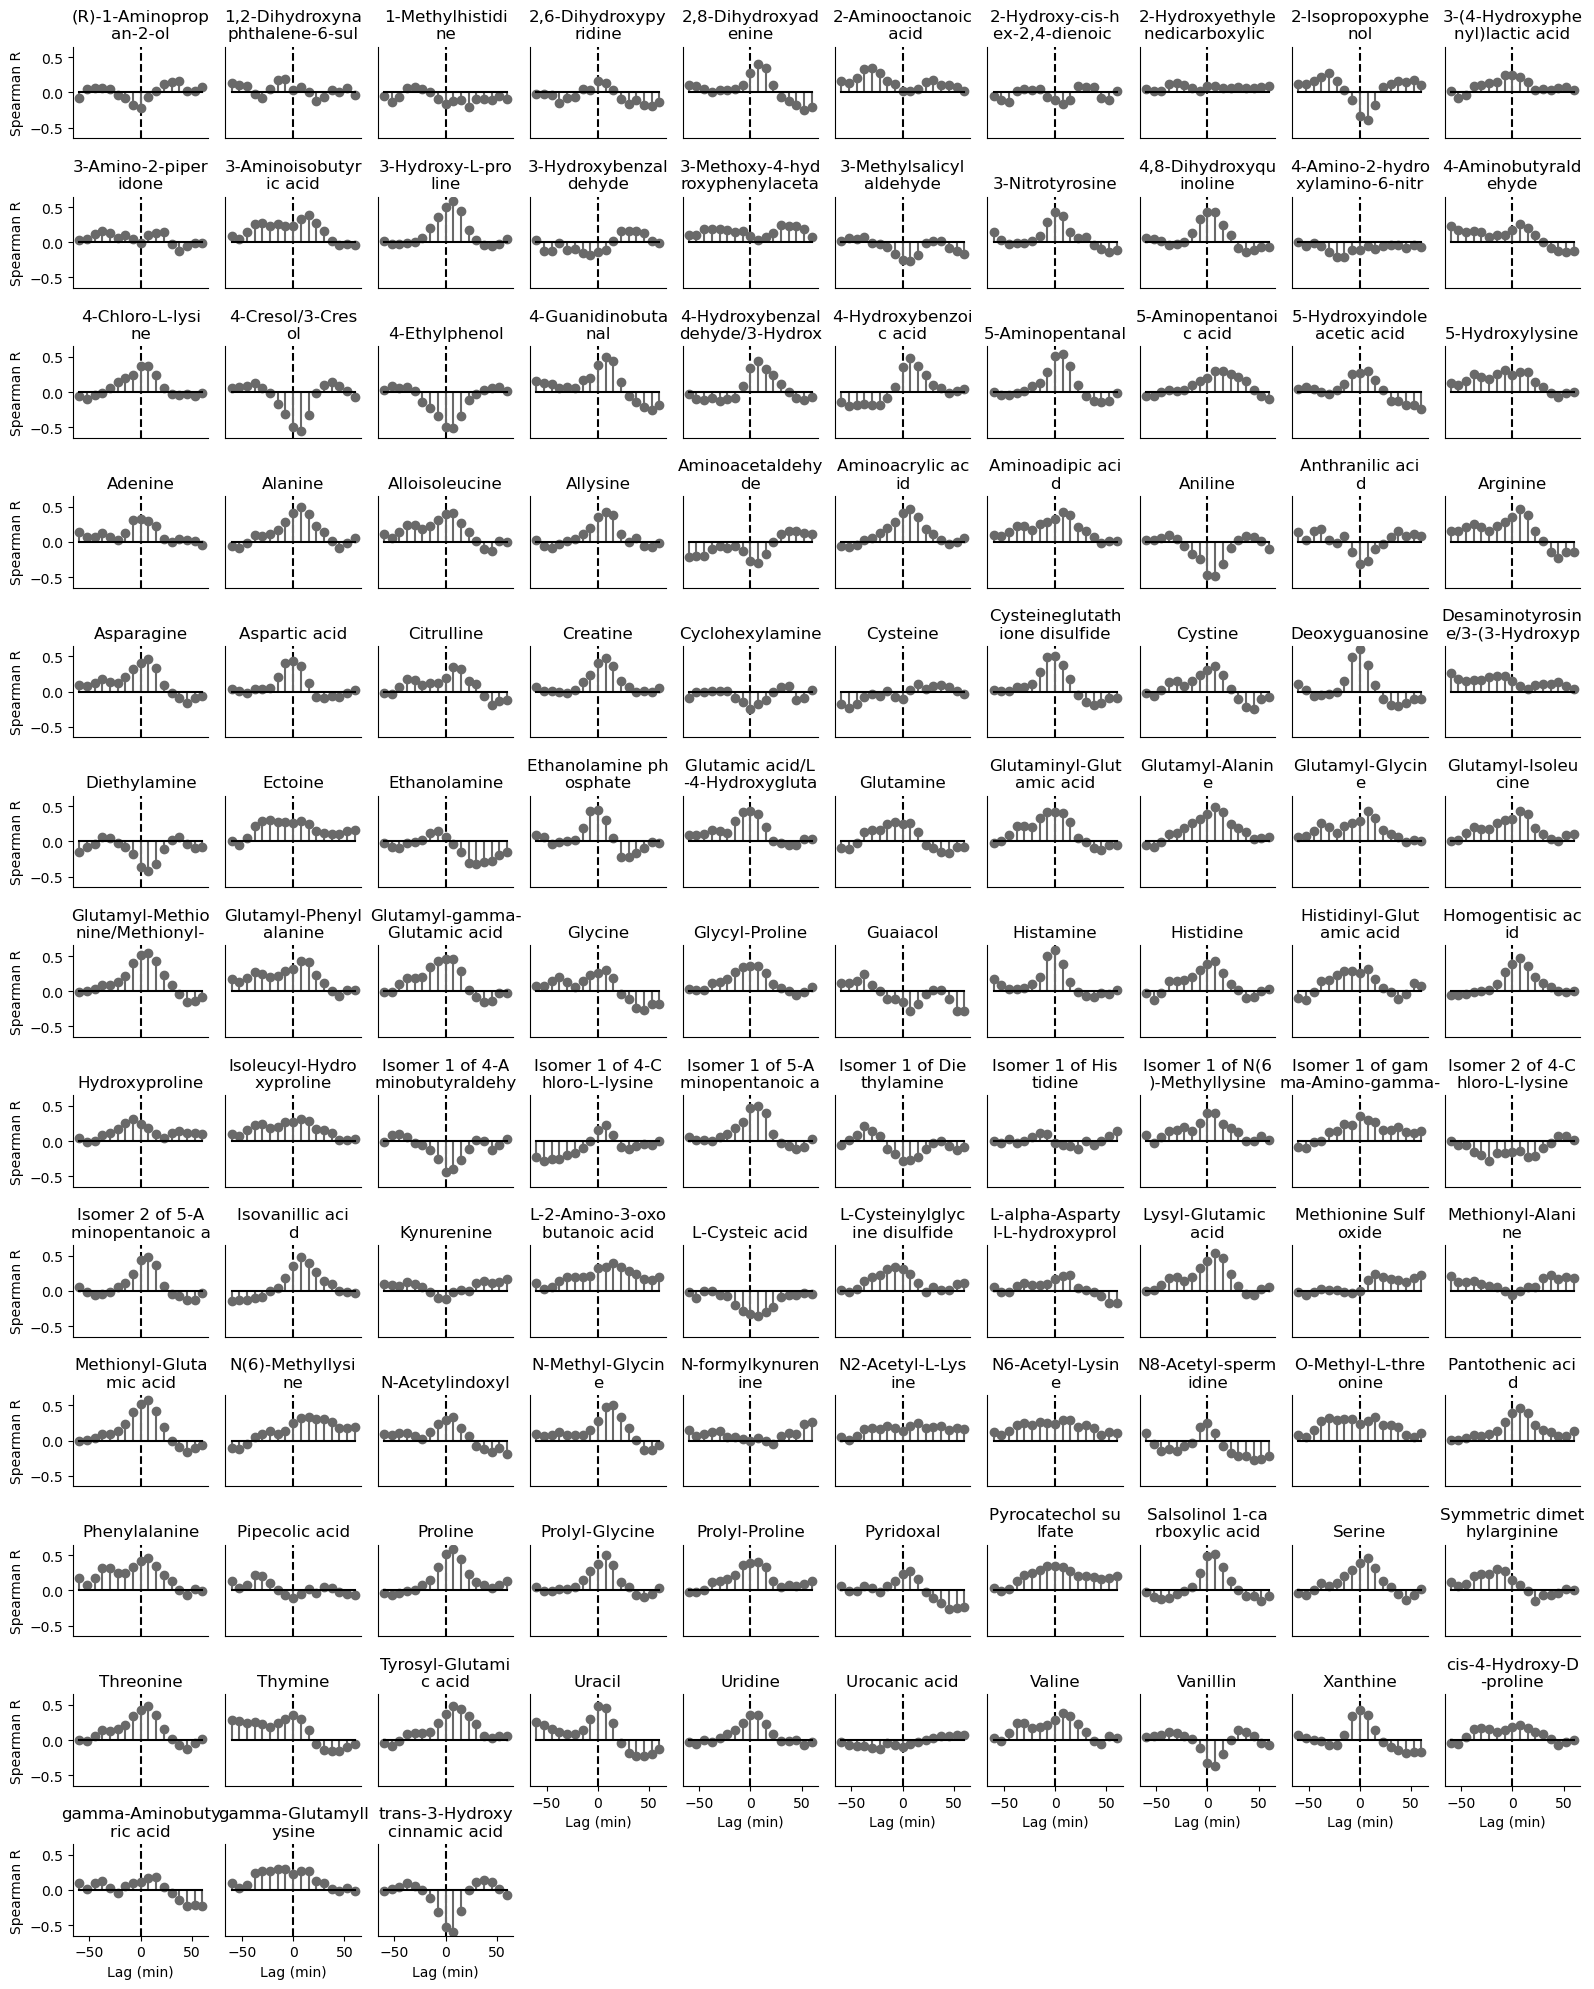

In [63]:
# plot all the spearman cross-correlations
plt.figure(figsize=(16  , 20))
for idx in np.arange(0,len(common_comps)):
    plt.subplot(13, 10, idx+1)
    if idx >= 113:
        plt.xlabel('Lag (minutes)')
        if idx % 10 != 0:
            plot_ccf(idx, common_comps, 9,True,False)
        else:
            plot_ccf(idx, common_comps, 9, True, True)
    elif idx % 10 == 0:
        plot_ccf(idx, common_comps, 9,False,True)
        plt.ylabel('Spearman R')
    else:
        plot_ccf(idx, common_comps, 9,False,False)
    plt.ylim(-0.65, 0.65)
plt.tight_layout()
plt.savefig(supp_figure_dir+'SuppFig6.eps',dpi=600)
plt.savefig(main_figure_dir+'SuppFig6.png',dpi=600)
plt.show()

In [64]:
# check number of significant positive / negative correlations at lag 0 using Bonferroni correction
pos_count = 0
neg_count = 0
alpha = 0.05 / len(common_comps)  # Bonferroni correction
for i, comp in enumerate(common_comps):
    r,p = spearmanr(X[:, i], y)
    if p < alpha:
        if r > 0:
            pos_count += 1
        else:
            neg_count += 1
print(f'Number of significant positive correlations at lag 0: {pos_count}')
print(f'Number of significant negative correlations at lag 0: {neg_count}')

Number of significant positive correlations at lag 0: 74
Number of significant negative correlations at lag 0: 13


# high vs low locomotion periods

Text(0, 0.5, 'Locomotion (log z-score)')

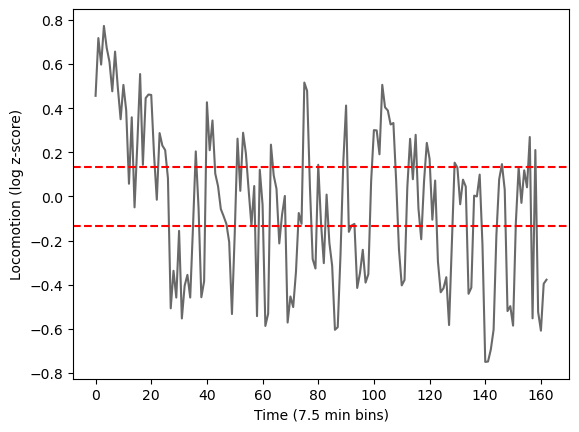

In [65]:
plt.plot(y,c='dimgrey')
y_med = np.median(y)
y_abd = np.median(np.abs(y - y_med))
plt.axhline(y_med - y_abd/2, color='r', linestyle='--')
plt.axhline(y_med + y_abd/2, color='r', linestyle='--')
plt.xlabel('Time (7.5 min bins)')
plt.ylabel('Locomotion (log z-score)')

In [66]:
# to make analysis aware of concatenation/animal change 
# we need to know the transition points between mouse 1/2 
# and between mouse 2/3
m1to2=len(X1)
m2to3=m1to2+len(X2)
print(m1to2,m2to3)

# take periods where y is above median for more than one lag
above_med = y > y_med+ y_abd/2
# set first sample of mouse 2 and mouse 3 to False
# since there cannot be two conecutive time bins
# at the beginning of any mouse
above_med[m1to2]=False
above_med[m2to3]=False
# find contiguous regions where above_med is True
labeled, n_labels = label(above_med)
# find lengths of each labeled region
lengths = np.bincount(labeled)[1:]  # skip background count at index 0
# find labels of regions longer than 1 lag
long_labels = np.where(lengths >= 2)[0] + 1  # skip background label 0
# create mask for long regions
mask_run = np.isin(labeled, long_labels)

# take periods where y is below median for more than one lag
below_med = y < y_med - y_abd/2
# set first sample of mouse 2 and mouse 3 to False
# since there cannot be two conecutive time bins
# at the beginning of any mouse
below_med[m1to2]=False
below_med[m2to3]=False# find contiguous regions where below_med is True
labeled, n_labels = label(below_med)
# find lengths of each labeled region
lengths = np.bincount(labeled)[1:]  # skip background count at index 0
# find labels of regions longer than 1 lag
long_labels = np.where(lengths >= 2)[0] + 1  # skip background label 0
# create mask for long regions
mask_imm = np.isin(labeled, long_labels)
print(np.sum(mask_run),np.sum(mask_imm))

50 101
39 55


(45.0, 55.0)

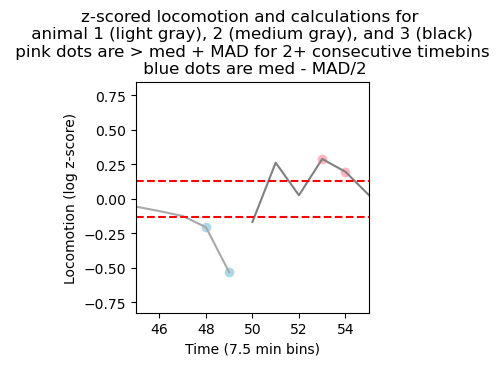

In [67]:
plt.figure(figsize=(3,3))
plt.plot(y[:len(X1)],c='darkgrey')
plt.plot(np.arange(len(X1),len(y)-len(X3)),y[len(X1):len(y)-len(X3)],c='grey')
plt.plot(np.arange(len(X1)+len(X2),len(y)),y[len(X1)+len(X2):],c='black')

y_med = np.median(y)
y_abd = np.median(np.abs(y - y_med))
plt.axhline(y_med - y_abd/2, color='r', linestyle='--')
plt.axhline(y_med + y_abd/2, color='r', linestyle='--')
plt.xlabel('Time (7.5 min bins)')
plt.ylabel('Locomotion (log z-score)')
plt.scatter(np.arange(0,len(y))*mask_run,y*mask_run,c='lightpink')
plt.scatter(np.arange(0,len(y))*mask_imm,y*mask_imm,c='lightblue')
plt.scatter(0,0,c='white',s=60)

plt.title('z-scored locomotion and calculations for \n animal 1 (light gray), 2 (medium gray), and 3 (black) \n pink dots are > med + MAD for 2+ consecutive timebins \n blue dots are med - MAD/2')
plt.xlim(45,55)

(95.0, 105.0)

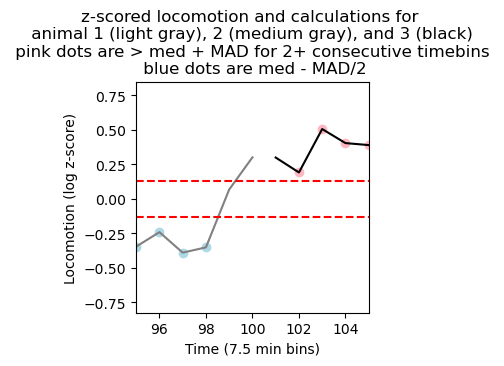

In [68]:
plt.figure(figsize=(3,3))
plt.plot(y[:len(X1)],c='darkgrey')
plt.plot(np.arange(len(X1),len(y)-len(X3)),y[len(X1):len(y)-len(X3)],c='grey')
plt.plot(np.arange(len(X1)+len(X2),len(y)),y[len(X1)+len(X2):],c='black')

y_med = np.median(y)
y_abd = np.median(np.abs(y - y_med))
plt.axhline(y_med - y_abd/2, color='r', linestyle='--')
plt.axhline(y_med + y_abd/2, color='r', linestyle='--')
plt.xlabel('Time (7.5 min bins)')
plt.ylabel('Locomotion (log z-score)')
plt.scatter(np.arange(0,len(y))*mask_run,y*mask_run,c='lightpink')
plt.scatter(np.arange(0,len(y))*mask_imm,y*mask_imm,c='lightblue')
plt.scatter(0,0,c='white',s=60)

plt.title('z-scored locomotion and calculations for \n animal 1 (light gray), 2 (medium gray), and 3 (black) \n pink dots are > med + MAD for 2+ consecutive timebins \n blue dots are med - MAD/2')
plt.xlim(95,105)

In [69]:
# make analysis nan-aware (exclude timepoint where LCMS failed to meet inclusion criteria)
concat_mask = np.concatenate(nan_masks, axis=1)[:X.shape[1]].T

In [70]:
Xz = X.copy()
Xz[concat_mask] = np.nan
# zscore each row of Xz
X_z = (Xz - np.nanmean(Xz, axis=0)) / np.nanstd(Xz, axis=0)
X_run = X_z[mask_run]
X_imm = X_z[mask_imm]
X_run_median = np.nanmedian(X_run, axis=0)
X_imm_median = np.nanmedian(X_imm, axis=0)
arsorted = np.argsort(X_run_median - X_imm_median)
print("Compound with high diff running vs immobility:", common_comps[arsorted[-1]])
print("Compound with low diff running vs immobility:", common_comps[arsorted[0]])

Compound with high diff running vs immobility: Histamine
Compound with low diff running vs immobility: trans-3-Hydroxycinnamic acid


## Supplementary Figure 7

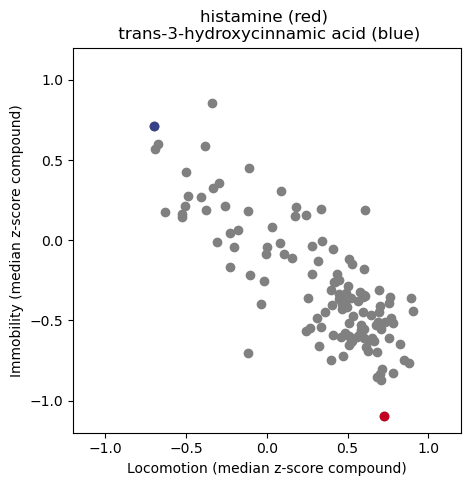

In [71]:

# highlight compounds that we referenced in the text
# scatter plot high vs low means
plt.figure(figsize=(5, 5))
plt.scatter(X_run_median, X_imm_median,c='gray')
plt.scatter(X_run_median[arsorted[-1]], X_imm_median[arsorted[-1]],c='#C30021',label=common_comps[arsorted[-1]])
plt.scatter(X_run_median[arsorted[0]], X_imm_median[arsorted[0]],c='#364285',label=common_comps[arsorted[0]])
plt.xlabel('Locomotion (median z-score compound)')
plt.ylabel('Immobility (median z-score compound)')
plt.title('histamine (red) \n trans-3-hydroxycinnamic acid (blue)')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.savefig(supp_figure_dir+'S7.eps', dpi=600)
plt.savefig(main_figure_dir+'SuppFig7.png', dpi=600)